In [1]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_csv('accident.csv')
df.head()

,Unnamed: 0,LONGITUDE,LATITUDE,SPD,LEN,ACC,VOL,F85th,LOCAL,F50th,Precip,Air max,min,obs,hour,Accident
0,0,-121.803753,37.227881,35,3200.0,18.0,8100.0,40.0,0,36.0,0.00,83,57,70.0,17.0,0
1,1,-121.791060,37.225223,25,3362.0,4.0,2550.0,29.0,0,26.0,0.07,67,47,57.0,7.0,0
2,2,-121.862273,37.341412,25,4400.0,42.0,7550.0,29.5,0,26.0,0.00,82,59,70.5,0.0,0
3,3,-121.900218,37.331962,25,1580.0,5.0,3000.0,29.5,0,26.0,0.02,69,49,59.0,19.0,0
4,4,-121.860729,37.358019,40,13100.0,281.0,29500.0,41.3,0,37.3,0.07,59,42,50.5,3.0,0


In [5]:
df.isnull()

,Unnamed: 0,LONGITUDE,LATITUDE,SPD,LEN,ACC,VOL,F85th,LOCAL,F50th,Precip,Air max,min,obs,hour,Accident
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4347,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4348,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4349,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4350,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


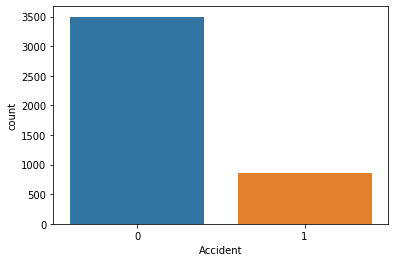

In [6]:
sns.countplot(x='Accident',data=df)

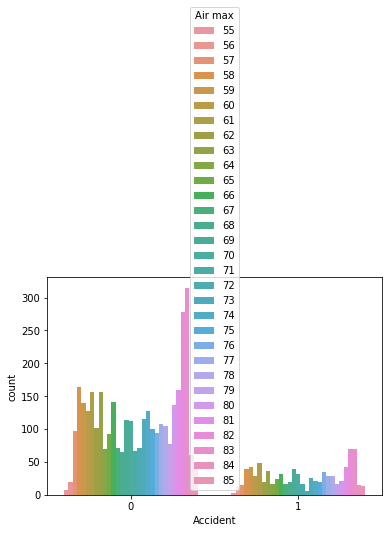

In [8]:
sns.countplot(x='Accident',hue='Air max',data=df)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4352 entries, 0 to 4351
Data columns (total 16 columns):
Unnamed: 0    4352 non-null int64
LONGITUDE     4352 non-null float64
LATITUDE      4352 non-null float64
SPD           4352 non-null int64
LEN           4352 non-null float64
ACC           4352 non-null float64
VOL           4352 non-null float64
F85th         4352 non-null float64
LOCAL         4352 non-null int64
F50th         4352 non-null float64
Precip        4352 non-null float64
Air max       4352 non-null int64
min           4352 non-null int64
obs           4352 non-null float64
hour          4352 non-null float64
Accident      4352 non-null int64
dtypes: float64(10), int64(6)
memory usage: 544.1 KB


In [23]:
 
X_train, X_test, y_train, y_test = train_test_split(df.drop('Accident',axis=1), 
                                                    df['Accident'], test_size=0.30)

In [24]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

/Library/Python/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1059
           1       0.00      0.00      0.00       247

    accuracy                           0.81      1306
   macro avg       0.41      0.50      0.45      1306
weighted avg       0.66      0.81      0.73      1306

